In [1]:
# Source: https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi

In [62]:
import pandas as pd
import numpy as np
import os
pd.options.display.width = 2000

from IPython.display import display_html

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 0. Define functions

In [65]:
'''
# display dataframe, 5 columns each time
def printing(arg):
    display_html ( df[arg].head(5) )
    
# print frequency, n columns each time
def freq(dfname, arg):
    dfx = dfname.copy()
    print(dfx.groupby(by=arg).size().reset_index())
'''

In [2]:
# display dataframe, 5 columns each time
def printing(arg):
    display_html ( df[arg].head(5) )
    
# print frequency, n columns each time
def freq(dfname, arg):
    print(dfname.groupby(by=arg).size().reset_index())

# 1. Retrieve data

In [3]:
df = pd.read_csv (r'C:\Users\Maggie\OneDrive\Learning\Python\data\df_arabica_clean.csv')

In [4]:
df_source = df.copy()

# 2. Explore data

## 2.1 Data contents

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

## 2.2 Modify data

## 2.2.1 modify column names

In [8]:
df.columns = df.columns.str.replace(" ", "_") # replace space in column name by underscore
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()           # change column name to all lower case
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed:_0             207 non-null    int64  
 1   id                     207 non-null    int64  
 2   country_of_origin      207 non-null    object 
 3   farm_name              205 non-null    object 
 4   lot_number             206 non-null    object 
 5   mill                   204 non-null    object 
 6   ico_number             75 non-null     object 
 7   company                207 non-null    object 
 8   altitude               206 non-null    object 
 9   region                 205 non-null    object 
 10  producer               206 non-null    object 
 11  number_of_bags         207 non-null    int64  
 12  bag_weight             207 non-null    object 
 13  in_country_partner     207 non-null    object 
 14  harvest_year           207 non-null    object 
 15  gradin

## 2.2.2 add continent by dictionary

In [12]:
# add continent by dictionary

# create dictionary
country = {'Brazil':'South America', 
'Colombia':'South America', 
'Costa Rica':'North America', 
'El Salvador':'North America', 
'Ethiopia':'Africa', 
'Guatemala':'North America', 
'Honduras':'North America', 
'Indonesia':'Asia', 
'Kenya':'Africa', 
'Laos':'Asia', 
'Madagascar':'Africa', 
'Mexico':'North America', 
'Myanmar':'Asia', 
'Nicaragua':'North America', 
'Panama':'North America', 
'Peru':'South America', 
'Taiwan':'Asia', 
'Tanzania, United Republic Of':'Africa', 
'Thailand':'Asia', 
'Uganda':'Africa', 
'United States (Hawaii)':'North America', 
'Vietnam':'Asia'
}


In [14]:
df['continent'] = df['country_of_origin'].map(country) 
freq(df, ['continent', 'country_of_origin'])

        continent             country_of_origin   0
0          Africa                      Ethiopia  11
1          Africa                         Kenya   2
2          Africa                    Madagascar   1
3          Africa  Tanzania, United Republic Of   6
4          Africa                        Uganda   3
5            Asia                     Indonesia   3
6            Asia                          Laos   3
7            Asia                       Myanmar   1
8            Asia                        Taiwan  61
9            Asia                      Thailand  12
10           Asia                       Vietnam   4
11  North America                    Costa Rica   8
12  North America                   El Salvador   7
13  North America                     Guatemala  21
14  North America                      Honduras  13
15  North America                        Mexico   4
16  North America                     Nicaragua   7
17  North America                        Panama   2
18  North Am

# 3. Explore data

In [22]:
printing(['id', 'country_of_origin', 'farm_name', 'lot_number', 'mill'])
printing(['ico_number', 'company', 'altitude', 'region', 'producer'])
printing(['number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year', 'grading_date'])
printing(['owner', 'variety', 'status', 'processing_method', 'aroma'])
printing(['flavor', 'aftertaste', 'acidity', 'body', 'balance'])
printing(['uniformity', 'clean_cup', 'sweetness', 'overall', 'defects'])
printing(['total_cup_points', 'moisture_percentage', 'category_one_defects', 'quakers', 'color'])
printing(['category_two_defects', 'expiration', 'certification_body', 
         'certification_address', 'certification_contact']) 
printing(['continent'])

,id,country_of_origin,farm_name,lot_number,mill
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario


,ico_number,company,altitude,region,producer
0,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez
1,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森
2,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI
3,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota
4,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde


,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date
0,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022"
1,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022"
2,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022"
3,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022"
4,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023"


,owner,variety,status,processing_method,aroma
0,Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58
1,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50
2,Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33
3,Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08
4,Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33


,flavor,aftertaste,acidity,body,balance
0,8.50,8.42,8.58,8.25,8.42
1,8.50,7.92,8.00,7.92,8.25
2,8.42,8.08,8.17,7.92,8.17
3,8.17,8.17,8.25,8.17,8.08
4,8.33,8.08,8.25,7.92,7.92


,uniformity,clean_cup,sweetness,overall,defects
0,10.0,10.0,10.0,8.58,0.0
1,10.0,10.0,10.0,8.50,0.0
2,10.0,10.0,10.0,8.33,0.0
3,10.0,10.0,10.0,8.25,0.0
4,10.0,10.0,10.0,8.25,0.0


,total_cup_points,moisture_percentage,category_one_defects,quakers,color
0,89.33,11.8,0,0,green
1,87.58,10.5,0,0,blue-green
2,87.42,10.4,0,0,yellowish
3,87.17,11.8,0,0,green
4,87.08,11.6,0,2,yellow-green


,category_two_defects,expiration,certification_body,certification_address,certification_contact
0,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


,continent
0,South America
1,Asia
2,Asia
3,North America
4,South America


In [17]:
# find no. of duplicate rows
df_temp = df[df.duplicated()]
df_temp.shape[0]

0

In [18]:
# find no. of duplicate rows, ignore column 'Unamed: 0'
df1 = df.drop('unnamed:_0', axis=1)
df_temp = df1[df1.duplicated()]
df_temp.shape[0]

0

In [19]:
# df.describe()
df.describe().loc[['count', 'min', 'max', 'mean']]

,unnamed:_0,id,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,overall,defects,total_cup_points,moisture_percentage,category_one_defects,quakers,category_two_defects
count,207.0,207.0,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.00000,207.000000,207.000000,207.000000,207.000000
min,0.0,0.0,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.00000,0.000000,0.000000,0.000000,0.000000
max,206.0,206.0,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.33000,13.500000,5.000000,12.000000,16.000000
mean,103.0,103.0,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.70657,10.735266,0.135266,0.690821,2.251208


In [20]:
df.describe(include=[object])

,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,bag_weight,in_country_partner,harvest_year,grading_date,owner,variety,status,processing_method,color,expiration,certification_body,certification_address,certification_contact,continent
count,207,205,206,204,75,207,206,205,206,207,207,207,207,207,201,207,202,207,207,207,207,207,207
unique,22,172,187,162,67,72,97,120,172,39,21,7,75,80,48,1,10,12,75,21,21,21,4
top,Taiwan,Doi Tung Development Project,1,Dry Mill,non,Taiwan Coffee Laboratory,1200,Chiayi,Doi Tung Development Project,30 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Caturra,Completed,Washed / Wet,green,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Asia
freq,61,7,11,11,5,51,23,12,7,39,83,99,40,30,27,207,124,101,40,83,83,83,84


In [21]:
freq(df, 'country_of_origin')

               country_of_origin   0
0                         Brazil  10
1                       Colombia  19
2                     Costa Rica   8
3                    El Salvador   7
4                       Ethiopia  11
5                      Guatemala  21
6                       Honduras  13
7                      Indonesia   3
8                          Kenya   2
9                           Laos   3
10                    Madagascar   1
11                        Mexico   4
12                       Myanmar   1
13                     Nicaragua   7
14                        Panama   2
15                          Peru   4
16                        Taiwan  61
17  Tanzania, United Republic Of   6
18                      Thailand  12
19                        Uganda   3
20        United States (Hawaii)   5
21                       Vietnam   4


In [21]:
df['country_of_origin'].value_counts(dropna=False).sort_index()

Brazil                          10
Colombia                        19
Costa Rica                       8
El Salvador                      7
Ethiopia                        11
Guatemala                       21
Honduras                        13
Indonesia                        3
Kenya                            2
Laos                             3
Madagascar                       1
Mexico                           4
Myanmar                          1
Nicaragua                        7
Panama                           2
Peru                             4
Taiwan                          61
Tanzania, United Republic Of     6
Thailand                        12
Uganda                           3
United States (Hawaii)           5
Vietnam                          4
Name: country_of_origin, dtype: int64

# 4. Statistics

## 4.1 aroma by continent

In [23]:
# calculate count, mean, max, min
df.groupby('continent').agg({'aroma': ['count','mean','max','min']})

aroma                      
              count      mean   max   min
continent                                
Africa           23  7.870435  8.17  7.42
Asia             84  7.771905  8.50  7.17
North America    67  7.629104  8.33  6.50
South America    33  7.674242  8.58  7.17

## 4.1.1 display statistics in dataframe (group by continent)

In [280]:
df_break = df.groupby('continent',as_index=False).agg(
              frequency =('aroma','count'),
              avg     =('aroma','mean'),
              maximum =('aroma','max'),
              minimum =('aroma','min')
             ).reset_index()
print(df_break)

   index      continent  frequency       avg  maximum  minimum
0      0         Africa         23  7.870435     8.17     7.42
1      1           Asia         84  7.771905     8.50     7.17
2      2  North America         67  7.629104     8.33     6.50
3      3  South America         33  7.674242     8.58     7.17


## 4.1.2 display total statistics in dataframe

In [281]:
df_total = df.agg(
              frequency =('aroma','count'),
              avg     =('aroma','mean'),
              maximum =('aroma','max'),
              minimum =('aroma','min')
             )
print(df_total)

                aroma
frequency  207.000000
avg          7.721063
maximum      8.580000
minimum      6.500000


## 4.1.3 transpose data and add columns

In [282]:
df_total_T = df_total.T
df_total_T

,frequency,avg,maximum,minimum
aroma,207.0,7.721063,8.58,6.5


In [283]:
df_total_T.reset_index()

,index,frequency,avg,maximum,minimum
0,aroma,207.0,7.721063,8.58,6.5


In [284]:
df_total_T['continent'] = 'TOTAL'
df_total_T['dummy'] = 1
df_total_T

,frequency,avg,maximum,minimum,continent,dummy
aroma,207.0,7.721063,8.58,6.5,TOTAL,1


## 4.1.4 append grouped data and total data

In [285]:
df_temp_0 = df_break.append(df_total_T)
df_temp_0['dummy'] = 1
df_temp_0

,index,continent,frequency,avg,maximum,minimum,dummy
0,0.0,Africa,23.0,7.870435,8.17,7.42,1
1,1.0,Asia,84.0,7.771905,8.50,7.17,1
2,2.0,North America,67.0,7.629104,8.33,6.50,1
3,3.0,South America,33.0,7.674242,8.58,7.17,1
aroma,NaN,TOTAL,207.0,7.721063,8.58,6.50,1


## 4.1.5 calculate proportion and index

In [286]:
df_total_T_1 = df_total_T.rename(columns={'avg':'total_avg', 'frequency':'total_frequency'})
df_temp_1 = pd.merge(df_all, df_total_T_1[['total_avg','total_frequency','dummy']], how='left', on='dummy')
df_temp_1

,index,continent,frequency,avg,maximum,minimum,dummy,total_avg,total_frequency
0,0.0,Africa,23.0,7.870435,8.17,7.42,1,7.721063,207.0
1,1.0,Asia,84.0,7.771905,8.50,7.17,1,7.721063,207.0
2,2.0,North America,67.0,7.629104,8.33,6.50,1,7.721063,207.0
3,3.0,South America,33.0,7.674242,8.58,7.17,1,7.721063,207.0
4,NaN,TOTAL,207.0,7.721063,8.58,6.50,1,7.721063,207.0


In [287]:
df_temp_1['proportion'] = df_temp_1['frequency'] / df_temp_1['total_frequency'] * 100
df_temp_1['var_index']  = df_temp_1['avg'] / df_temp_1['total_avg'] * 100
df_temp_1.drop(['total_avg','total_frequency','dummy','index'], axis=1, inplace=True)
df_temp_1

,continent,frequency,avg,maximum,minimum,proportion,var_index
0,Africa,23.0,7.870435,8.17,7.42,11.111111,101.934604
1,Asia,84.0,7.771905,8.50,7.17,40.579710,100.658484
2,North America,67.0,7.629104,8.33,6.50,32.367150,98.808994
3,South America,33.0,7.674242,8.58,7.17,15.942029,99.393602
4,TOTAL,207.0,7.721063,8.58,6.50,100.000000,100.000000


## 4.1.6 convert frequency and var_index to integer, average and proportion to 2 decimal places

In [278]:
df_temp_1[['frequency','var_index']]= df_temp_1[['frequency','var_index']].astype(int)
df_temp_1

,continent,frequency,avg,maximum,minimum,proportion,var_index
0,Africa,23,7.870435,8.17,7.42,11.111111,101
1,Asia,84,7.771905,8.50,7.17,40.579710,100
2,North America,67,7.629104,8.33,6.50,32.367150,98
3,South America,33,7.674242,8.58,7.17,15.942029,99
4,TOTAL,207,7.721063,8.58,6.50,100.000000,100


In [279]:
df_temp_1 = df_temp_1.round({'avg':2, 'proportion':2})
df_temp_1

# alternative:
# df_temp_1[['avg','proportion']] = df_temp_1[['avg','proportion']].apply(lambda x: round(x, 2))

,continent,frequency,avg,maximum,minimum,proportion,var_index
0,Africa,23,7.87,8.17,7.42,11.11,101
1,Asia,84,7.77,8.50,7.17,40.58,100
2,North America,67,7.63,8.33,6.50,32.37,98
3,South America,33,7.67,8.58,7.17,15.94,99
4,TOTAL,207,7.72,8.58,6.50,100.00,100


## 4.1.7 combine program

In [289]:
# grouped data
df_break = df.groupby('continent',as_index=False).agg(
              frequency =('aroma','count'),
              avg     =('aroma','mean'),
              maximum =('aroma','max'),
              minimum =('aroma','min')
             ).reset_index()

# total data
df_total = df.agg(
              frequency =('aroma','count'),
              avg     =('aroma','mean'),
              maximum =('aroma','max'),
              minimum =('aroma','min')
             )

# transpose
df_total_T = df_total.T
df_total_T.reset_index()
df_total_T['continent'] = 'TOTAL'
df_total_T['dummy'] = 1

# append grouped data and total data
df_temp_0 = df_break.append(df_total_T)
df_temp_0['dummy'] = 1

df_total_T_1 = df_total_T.rename(columns={'avg':'total_avg', 'frequency':'total_frequency'})
df_temp_1 = pd.merge(df_all, df_total_T_1[['total_avg','total_frequency','dummy']], how='left', on='dummy')

df_temp_1['proportion'] = df_temp_1['frequency'] / df_temp_1['total_frequency'] * 100
df_temp_1['var_index']  = df_temp_1['avg'] / df_temp_1['total_avg'] * 100
df_temp_1.drop(['total_avg','total_frequency','dummy','index'], axis=1, inplace=True)

# handle decimal places
df_temp_1[['frequency','var_index']]= df_temp_1[['frequency','var_index']].astype(int)
df_temp_1 = df_temp_1.round({'avg':2, 'proportion':2})

df_temp_1

,continent,frequency,avg,maximum,minimum,proportion,var_index
0,Africa,23,7.87,8.17,7.42,11.11,101
1,Asia,84,7.77,8.50,7.17,40.58,100
2,North America,67,7.63,8.33,6.50,32.37,98
3,South America,33,7.67,8.58,7.17,15.94,99
4,TOTAL,207,7.72,8.58,6.50,100.00,100


## 4.1.8 develop function to calculate score by category

In [329]:
def score_by_category(score, category):
    # grouped data
    df_break = df.groupby(category,as_index=False).agg(
                  frequency =(score,'count'),
                  avg     =(score,'mean'),
                  maximum =(score,'max'),
                  minimum =(score,'min')
                 ).reset_index()

    # total data
    df_total = df.agg(
                  frequency =(score,'count'),
                  avg     =(score,'mean'),
                  maximum =(score,'max'),
                  minimum =(score,'min')
                 )

    # transpose
    df_total_T = df_total.T
    df_total_T.reset_index()
    df_total_T[category] = 'TOTAL'
    df_total_T['dummy'] = 1

    # append grouped data and total data
    df_temp_0 = df_break.append(df_total_T)
    df_temp_0['dummy'] = 1

    df_total_T_1 = df_total_T.rename(columns={'avg':'total_avg', 'frequency':'total_frequency'})
    df_temp_1 = pd.merge(df_temp_0, df_total_T_1[['total_avg','total_frequency','dummy']], 
                         how='left', on='dummy')

    df_temp_1['proportion'] = df_temp_1['frequency'] / df_temp_1['total_frequency'] * 100
    df_temp_1['var_index']  = df_temp_1['avg'] / df_temp_1['total_avg'] * 100
    df_temp_1.drop(['total_avg','total_frequency','dummy','index'], axis=1, inplace=True)

    # handle decimal places
    df_temp_1[['frequency','var_index']]= df_temp_1[['frequency','var_index']].astype(int)
    df_temp_1 = df_temp_1.round({'avg':2, 'proportion':2})

    display_html ( df_temp_1.head(1000) )

In [330]:
print('----- Aroma by Continent -----')
score_by_category('aroma', 'continent')

----- Aroma by Continent -----


,continent,frequency,avg,maximum,minimum,proportion,var_index
0,Africa,23,7.87,8.17,7.42,11.11,101
1,Asia,84,7.77,8.50,7.17,40.58,100
2,North America,67,7.63,8.33,6.50,32.37,98
3,South America,33,7.67,8.58,7.17,15.94,99
4,TOTAL,207,7.72,8.58,6.50,100.00,100


In [331]:
print('----- Aroma by country_of_origin -----')
score_by_category('aroma', 'country_of_origin')

----- Aroma by country_of_origin -----


,country_of_origin,frequency,avg,maximum,minimum,proportion,var_index
0,Brazil,10,7.48,7.83,7.17,4.83,96
1,Colombia,19,7.78,8.58,7.25,9.18,100
2,Costa Rica,8,7.59,8.08,7.33,3.86,98
3,El Salvador,7,7.33,7.83,6.50,3.38,94
4,Ethiopia,11,7.86,8.17,7.42,5.31,101
5,Guatemala,21,7.70,8.33,7.33,10.14,99
6,Honduras,13,7.71,7.83,7.58,6.28,99
7,Indonesia,3,7.72,7.83,7.67,1.45,100
8,Kenya,2,7.84,8.17,7.50,0.97,101
9,Laos,3,7.75,8.33,7.25,1.45,100


In [332]:
score_by_category('aroma','harvest_year')

,harvest_year,frequency,avg,maximum,minimum,proportion,var_index
0,2017 / 2018,1,7.75,7.75,7.75,0.48,100
1,2018 / 2019,1,7.42,7.42,7.42,0.48,96
2,2021,13,7.58,8.08,7.25,6.28,98
3,2021 / 2022,99,7.77,8.58,7.25,47.83,100
4,2022,48,7.76,8.33,7.17,23.19,100
5,2022 / 2023,42,7.66,8.17,7.17,20.29,99
6,2023,3,7.00,7.42,6.50,1.45,90
7,TOTAL,207,7.72,8.58,6.50,100.00,100


In [333]:
score_by_category('aroma','processing_method')

,processing_method,frequency,avg,maximum,minimum,proportion,var_index
0,Anaerobico 1000h,1,7.67,7.67,7.67,0.48,99
1,Double Anaerobic Washed,1,8.58,8.58,8.58,0.48,111
2,Double Carbonic Maceration / Natural,1,7.83,7.83,7.83,0.48,101
3,"Honey,Mossto",1,8.33,8.33,8.33,0.48,107
4,Natural / Dry,46,7.73,8.25,6.50,22.22,100
5,Pulped natural / honey,25,7.67,8.25,7.25,12.08,99
6,SEMI-LAVADO,1,7.25,7.25,7.25,0.48,93
7,Semi Washed,1,8.33,8.33,8.33,0.48,107
8,Washed / Wet,124,7.71,8.50,7.17,59.90,99
9,Wet Hulling,1,7.67,7.67,7.67,0.48,99


In [335]:
score_by_category('aroma','in_country_partner')

,in_country_partner,frequency,avg,maximum,minimum,proportion,var_index
0,ASOCIACIÓN COLOMBIANA PARA LA EXCELENCIA DEL CAFE,4,7.86,8.00,7.75,1.93,101
1,Asociacion Nacional Del Café,14,7.65,7.83,7.58,6.76,99
2,Asociación de Cafés Especiales de Nicaragua,3,7.36,7.42,7.33,1.45,95
3,Barista and Coffee Academy of Asia,1,7.83,7.83,7.83,0.48,101
4,Blossom Valley International宸嶧國際,6,7.85,8.08,7.67,2.90,101
5,Brazil Specialty Coffee Association,4,7.52,7.83,7.17,1.93,97
6,Centro Agroecológico del Café A.C.,5,7.65,8.00,7.25,2.42,99
7,FABB Academy of Coffee,9,7.44,7.92,7.17,4.35,96
8,Firedancer Coffee Consultants,1,7.50,7.50,7.50,0.48,97
9,Instituto Hondureño del Café,10,7.71,7.83,7.58,4.83,99


In [334]:
df['altitude'].value_counts()

1200           23
1600           12
1250            7
1400            7
1300            7
1100            6
1350            6
1700            5
1368            5
1450            5
1850            4
1900            4
1400-1700       4
1500            3
800             3
200-300         3
1000            3
300             3
1300-1500       3
1800            3
850             3
1500-1600       2
600             2
250-300         2
650             2
150             2
2000            2
1905            2
950             2
1200 - 1580     2
1300-1400       2
150-250         2
400-600         1
1600-1750       1
1700-1930       1
1600-1900       1
250-400         1
1650            1
2100            1
300-500         1
400             1
5400            1
700             1
1950            1
435             1
1574            1
1800-2200       1
465             1
900             1
1060            1
1200 - 1300     1
1850-2100       1
1668            1
2150 - 2350     1
230             1
350-400   

# star diagram

In [ ]:
# https://plotly.com/python/radar-chart/

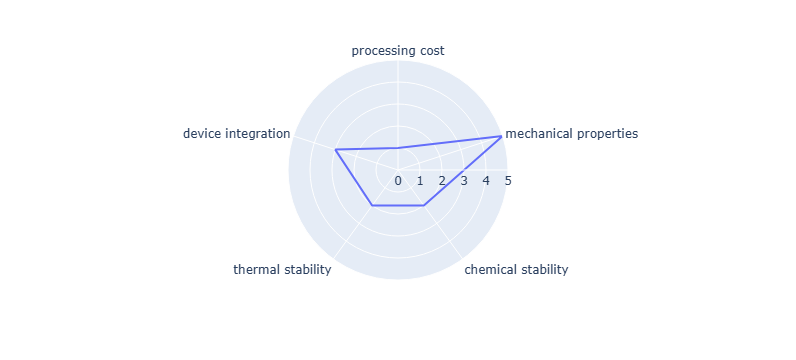

In [339]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

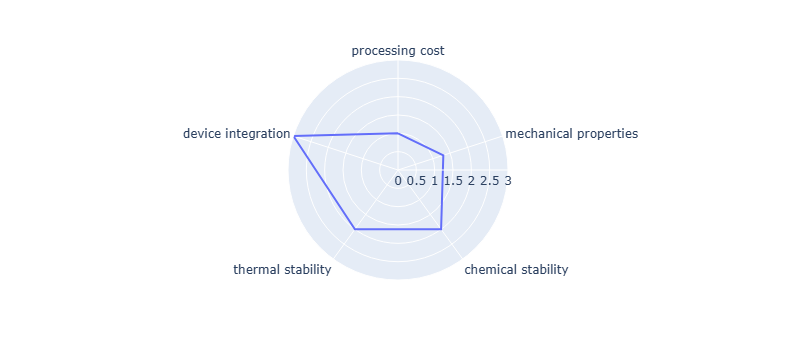

In [341]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=[1, 1.3, 2, 2, 3],
    theta=['processing cost','mechanical properties','chemical stability',
           'thermal stability', 'device integration']))
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.show()

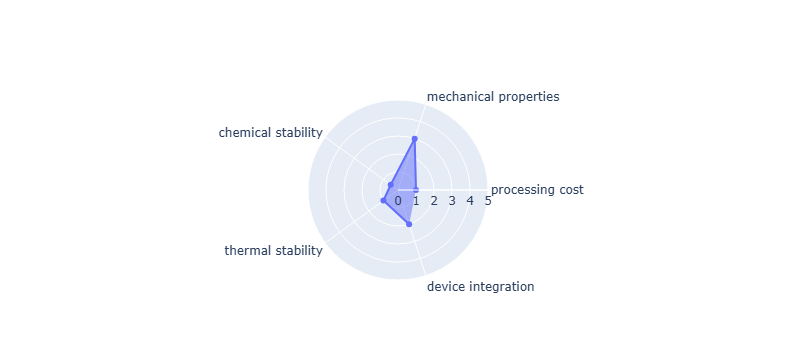

In [345]:
import plotly.graph_objects as go

categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

#fig.add_trace(go.Scatterpolar(
#      r=[1, 5, 2, 2, 3],
#      theta=categories,
#      fill='toself',
#      name='Product A'
#))
fig.add_trace(go.Scatterpolar(
      r=[1, 3, 0.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()